To demonstrate clustring, we will be use an adapted version of the glass dataset from the University of California – Irvine.
This data contains 218 observations and 9 features corresponding to the percent weight of various oxides found in glass:

* RI: refractive index
* Na: weight percent in sodium
* Mg: weight percent in magnesium
* Al: weight percent in aluminum
* Si: weight percent in silicon
* K: weight percent in potassium
* Ca: weight percent in calcium
* Ba: weight percent in barium
* Fe: weight percent in iron

In this case study, we will use the refractive index (RI) and weight percent in each oxide to segment the glass type.

**Dataset:**
You can find the dataset (glass.csv) under the datasets section on the Moodle.

### Step to do:

        1. Importing Packages Required:

In [1]:
#
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage 
import matplotlib.pyplot as plt 
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np

from sklearn.cluster import AgglomerativeClustering

    2. Read the Data in the Memory.

In [2]:
df = pd.read_csv('glass.csv', header = None)

    3. Print the Size of the Dataset and Printing the First Few Rows of the Dataset

In [3]:
df.head

<bound method NDFrame.head of            0      1     2     3      4     5     6     7   8
0         RI     Na    Mg    Al     Si     K    Ca    Ba  Fe
1    1.52101  13.64  4.49   1.1  71.78  0.06  8.75     0   0
2    1.51761  13.89   3.6  1.36  72.73  0.48  7.83     0   0
3    1.51618  13.53  3.55  1.54  72.99  0.39  7.78     0   0
4    1.51766  13.21  3.69  1.29  72.61  0.57  8.22     0   0
..       ...    ...   ...   ...    ...   ...   ...   ...  ..
214  1.51645  14.94     0  1.87  73.11     0  8.67  1.38   0
215  1.51831  14.39     0  1.82  72.86  1.41  6.47  2.88   0
216   1.5164  14.37     0  2.74  72.85     0  9.45  0.54   0
217  1.51623  14.14     0  2.88  72.61  0.08  9.18  1.06   0
218  1.51685  14.92     0  1.99  73.06     0   8.4  1.59   0

[219 rows x 9 columns]>

    4. Look for some basic data frame information  ( 1 point)

In [4]:
df.drop(0, axis=0, inplace=True)
df.describe()

,0,1,2,3,4,5,6,7,8
count,218,218,218,218,218,218,218,218,218
unique,148,123,79,103,113,60,117,31,30
top,1.51623,14.95,0,1.19,73.11,0,8.67,0,0
freq,5,6,69,7,8,45,6,144,149


    5. Remove any possible order effects in the data by shuffle the rows prior to building any models and save it as a new data frame object.  ( 1 point)


In [5]:
shuffled_df = df.sample(frac=1)
print(shuffled_df)

           0      1     2     3      4     5      6     7  8
35   1.51783  12.69  3.54  1.34  72.95  0.57   8.75     0  0
203  1.51651  14.38     0  1.94  73.61     0   8.48  1.57  0
81   1.51592  12.86  3.52  2.12  72.66  0.69   7.97     0  0
205  1.51727   14.7     0  2.34  73.28     0   8.95  0.66  0
168  1.51645  14.94     0  1.87  73.11     0   8.67  1.38  0
..       ...    ...   ...   ...    ...   ...    ...   ... ..
159  1.51727   14.7     0  2.34  73.28     0   8.95  0.66  0
112  1.52739  11.02     0  0.75  73.08     0  14.96     0  0
212  1.51617  14.95     0  2.27   73.3     0   8.71  0.67  0
2    1.51761  13.89   3.6  1.36  72.73  0.48   7.83     0  0
211  1.51658   14.8     0  1.99  73.11     0   8.28  1.71  0

[218 rows x 9 columns]


    6. Transform each observation into a z-score  ( 1 point)

In [6]:
scaler = StandardScaler().fit(shuffled_df)
shuffled_df = scaler.transform(shuffled_df)
print(shuffled_df)

[[-0.09315298 -1.04331769  0.73761884 ... -0.03762311 -0.56434318
  -0.57454325]
 [-0.53389127  0.89632556 -1.42127375 ... -0.24458535  1.86738408
  -0.57454325]
 [-0.73088793 -0.84820565  0.7254217  ... -0.63551402 -0.56434318
  -0.57454325]
 ...
 [-0.64741477  1.55052477 -1.42127375 ... -0.06828418  0.4734003
  -0.57454325]
 [-0.16660936  0.33394379  0.77421024 ... -0.74282778 -0.56434318
  -0.57454325]
 [-0.51051878  1.37836708 -1.42127375 ... -0.39789071  2.084226
  -0.57454325]]


    7. Perform hierarchical clustering using the linkage function on scaled_features with complete method.  ( 1 point)

In [7]:
# create linkage model
Z = linkage(shuffled_df, 'complete')
# hca = AgglomerativeClustering(3, linkage='complete')
# hca_clusters = hca.fit_predict(shuffled_df)
# hca_clusters


Now that the HCA model has been built, we will continue with the analysis by visualizing clusters using a dendrogram and using the visualization to generate predictions.

    8. Display the dendrogram by plotting the HCA model:  ( 1 point)
    - the leaf_rotation is 90 and , leaf_font_size is 6

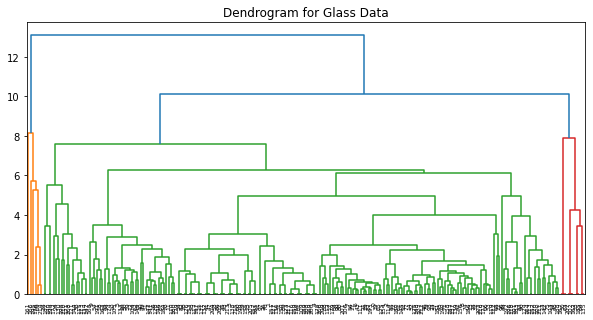

In [8]:
# plot dendrogram:

plt.figure(figsize=(10,5))
plt.title('Dendrogram for Glass Data')
dn = dendrogram(Z, leaf_rotation=90, leaf_font_size=6)
plt.show()


    9. interpret the HCA dendrogram,  ( 1 point)

utilizing HCA clusters our data into three groups

HCA has drawbacks include:

1. Vagueness in terms of the termination criteria (that is, when to finalize the number of clusters)
2. The algorithm cannot adjust once the clustering decisions have been made
3. Can be very computationally expensive to build HCA models on large datasets with many features

To address some of the HCA shortcomings,  use k-means, which has the ability to adjust when the clusters have been initially generated. It is more computationally frugal than HCA.

    10. Compute Silhouette score to measure how close observations within a cluster and plot the results.  ( 2 point)

Silhouette Scores for Glass Dataset:

HCA Clustering:  0.43499332413495406


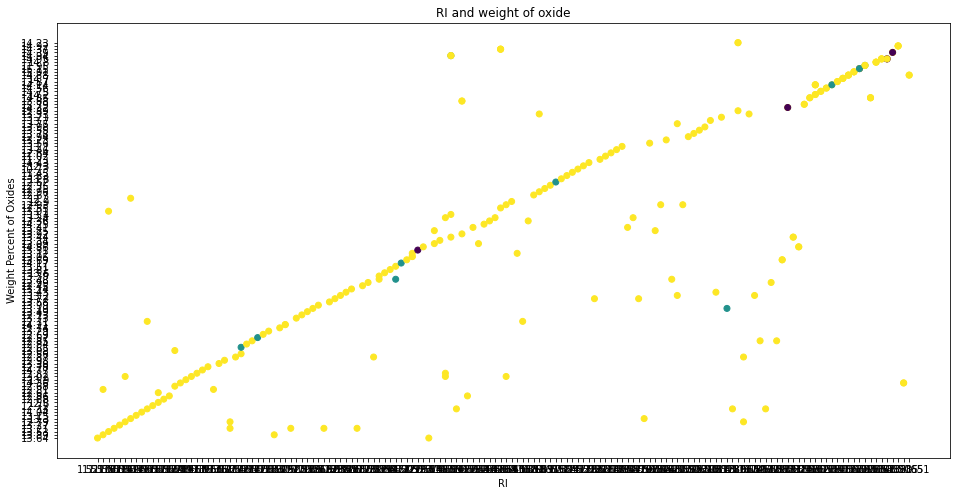

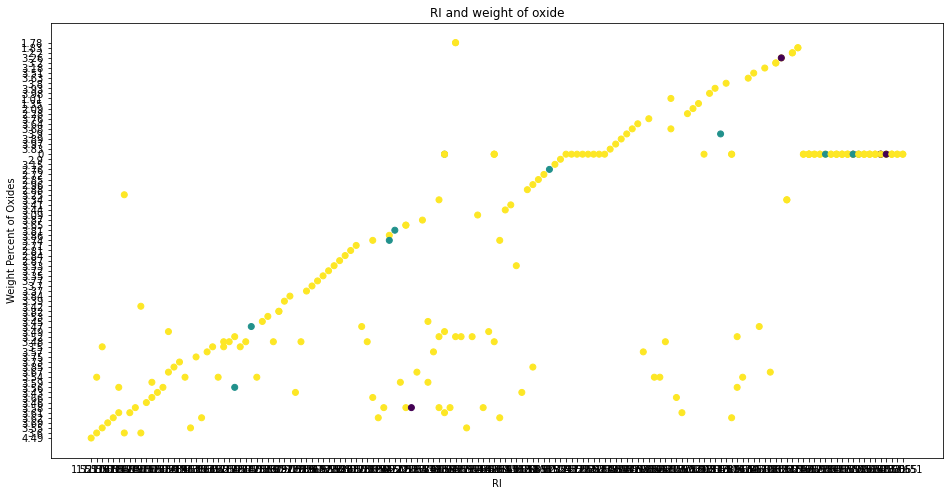

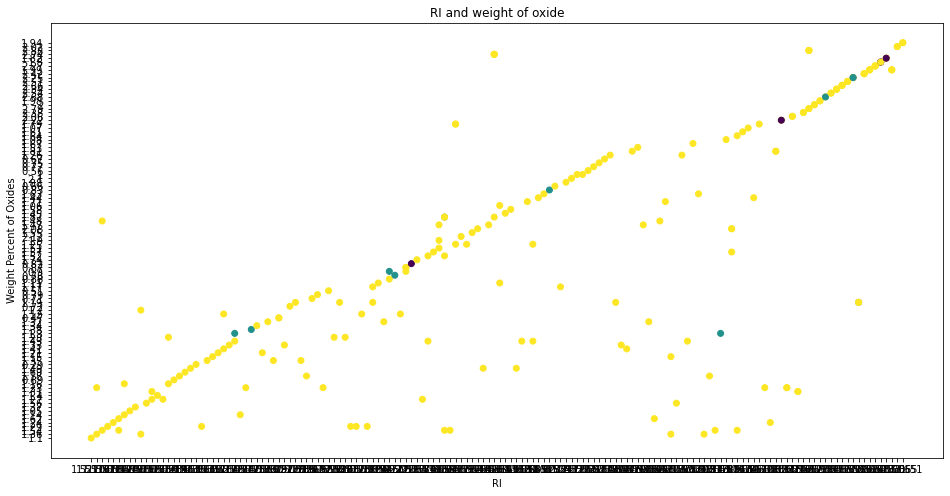

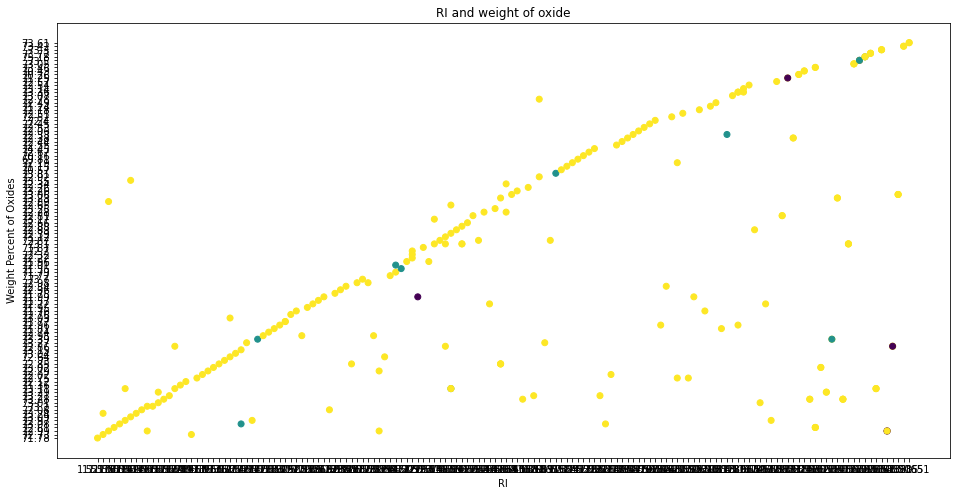

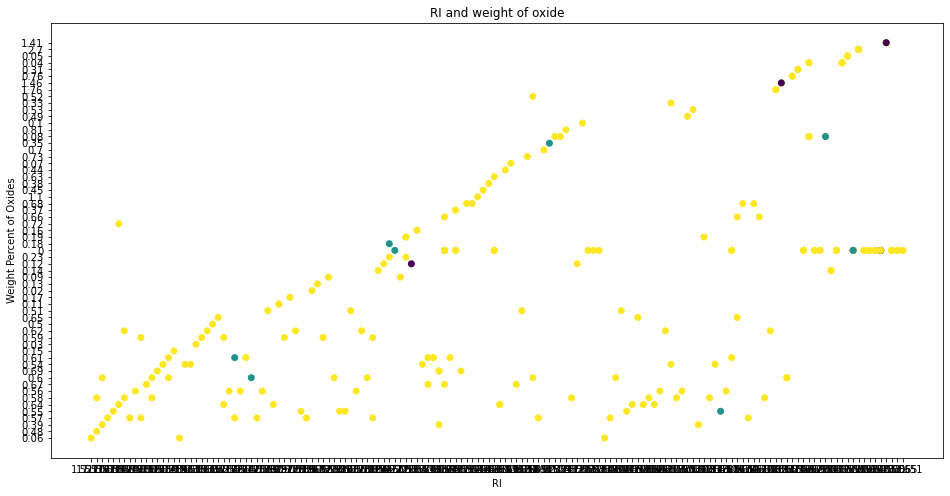

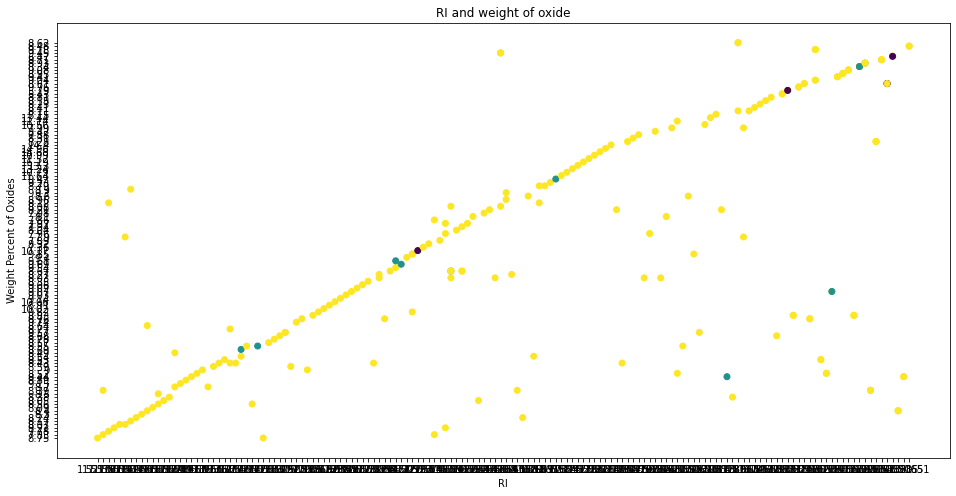

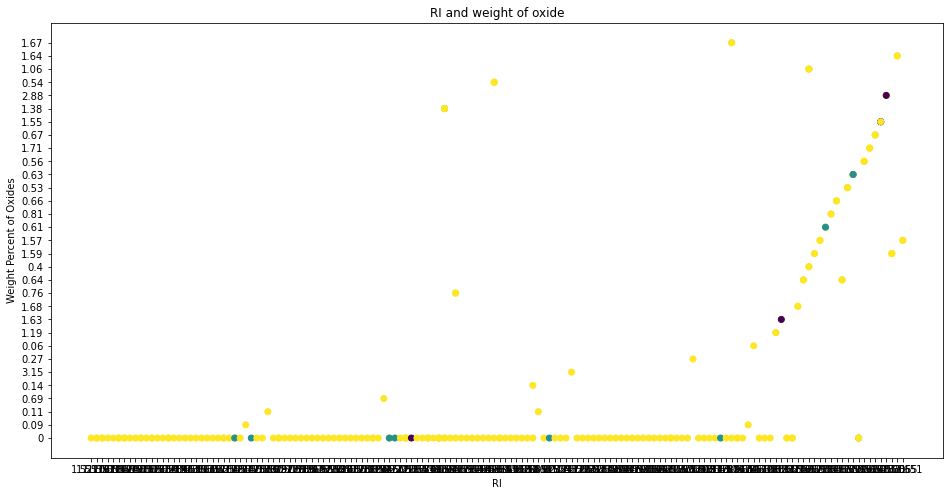

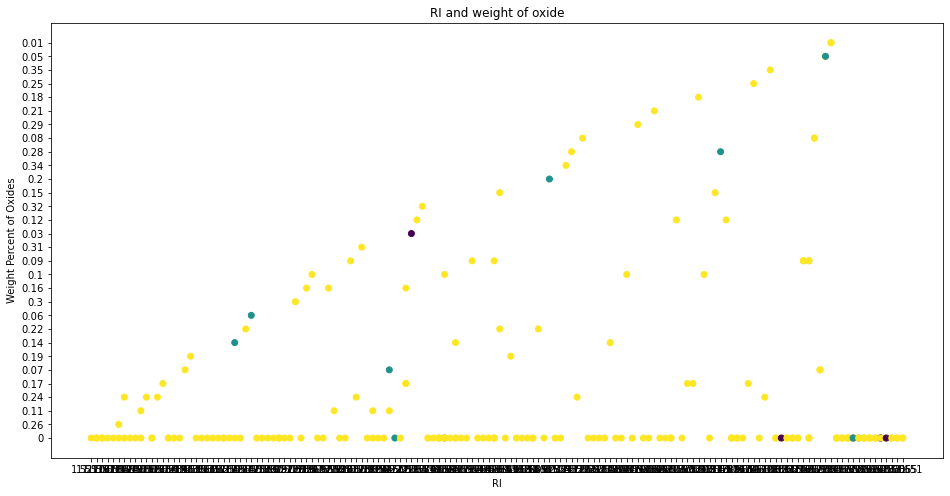

In [40]:
hca = AgglomerativeClustering(3, linkage='complete')
hca_clusters = hca.fit_predict(shuffled_df)
print("Silhouette Scores for Glass Dataset:\n")
print("HCA Clustering: ", silhouette_score(shuffled_df, hca_clusters))

for i in range(1, 9):
    plt.figure(figsize=(16,8))
    plt.scatter(df.values[:,0], df.values[:,i], c=hca_clusters)
    plt.title("RI and weight of oxide")
    plt.xlabel("RI")
    plt.ylabel("Weight Percent of Oxides")
    plt.show()

    11. apply k-Means Clustering for Optimal Number of Clusters  ( 1 point)

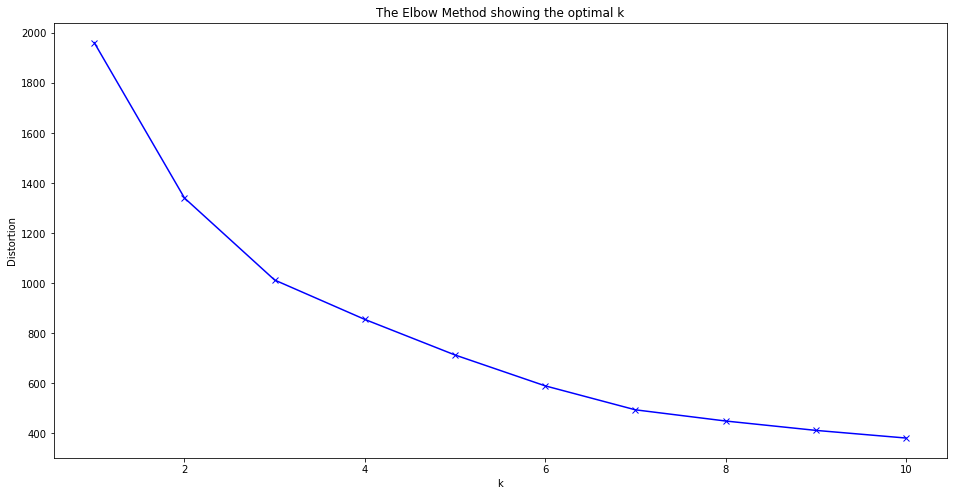

In [11]:
#Optimal number of clusters
distortions = []
for k in range(1, 11):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(shuffled_df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(range(1, 11), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
    


In [ ]:
# By observing the above graph there is high slope till 3, so the optimal number of clustter would be 3
# making 3 clusters using kMeans
km = KMeans(3)
km_clusters = km.fit_predict(shuffled_df)

    12. print the number of glasses that fall within each of clusters. ( 1 point)

In [ ]:
values, counts = np.unique(km_clusters, return_counts=True)
for v, c in zip(values, counts):
    print(f'{v} type cluster have {c} number of glasses')

0 type cluster have 38 number of glasses
1 type cluster have 121 number of glasses
2 type cluster have 59 number of glasses


    13. Using PCA to Transform Group-Related Features into Components  ( 1 point)

In [22]:
model = PCA()
model.fit_transform(shuffled_df)

array([[ 9.98322432e-01, -8.43397171e-01,  2.12706293e-03, ...,
         5.10636456e-01,  3.21843193e-02, -1.26747896e-02],
       [-2.80567948e+00,  5.23111092e-01,  4.99054894e-01, ...,
         4.46822193e-01,  4.23322880e-02, -2.11550670e-02],
       [ 3.83504674e-02, -1.38875808e+00, -2.61432804e-01, ...,
         6.75014712e-01, -4.45203548e-02, -6.34901778e-03],
       ...,
       [-2.71559513e+00,  5.94788516e-01,  2.16891247e-01, ...,
        -4.58225289e-01, -1.13705008e-01,  1.66252533e-02],
       [ 2.76715995e-01, -7.88625874e-01, -1.03197061e+00, ...,
        -1.99452202e-01, -2.20490560e-01, -1.30025104e-02],
       [-3.01728583e+00,  8.37413881e-01, -1.14236269e-01, ...,
         2.95660983e-01,  1.79667338e-01,  1.47655207e-02]])

    14. Get proportion of explained variance in each component ( 1 point)

In [23]:
Prop_exp_var = model.explained_variance_ratio_
print(Prop_exp_var)

[3.53143625e-01 2.50532563e-01 1.25244721e-01 9.69358544e-02
 9.26479607e-02 4.62631534e-02 2.77498886e-02 7.37245537e-03
 1.09779199e-04]


    15. Get the cumulative sum of explained variance by each component and plot the result.  ( 1 point)

[0.35314362 0.60367619 0.72892091 0.82585676 0.91850472 0.96476788
 0.99251777 0.99989022 1.        ]


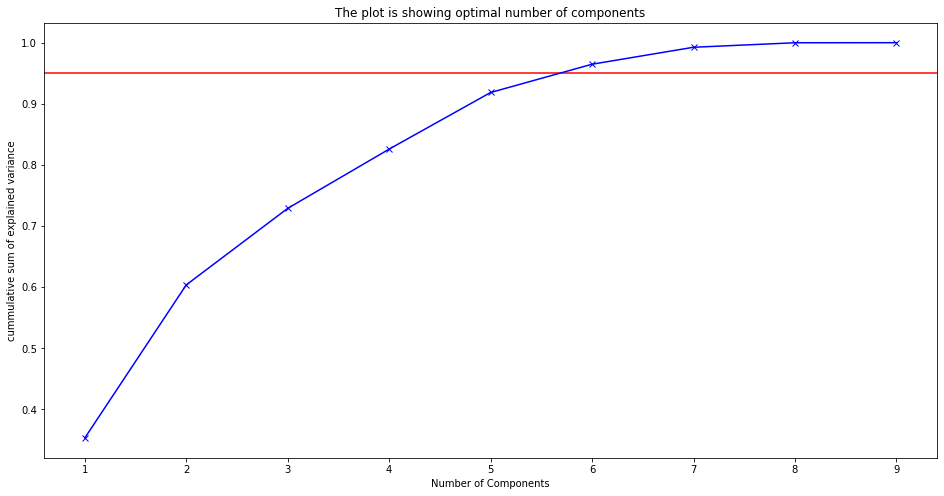

In [24]:
cum_sum_exp_var = np.cumsum(Prop_exp_var)
print(cum_sum_exp_var)

#Ploting
plt.figure(figsize=(16,8))
plt.axhline(y=0.95, color='r', linestyle='-') # Threshold
plt.plot(range(1, 10),cum_sum_exp_var , 'bx-')
plt.xlabel('Number of Components')
plt.ylabel('cummulative sum of explained variance')
plt.title('The plot is showing optimal number of components')
plt.show()

    16. Fit the PCA model with the best number of components ( 1 point)

In [26]:
#By observing the above plot, we could see that 6 components would be optimal as it is close to threshold.
model1 = PCA(n_components=6)
principal_components = model1.fit_transform(shuffled_df)

    17. Plot the first and second components ( 1 point)

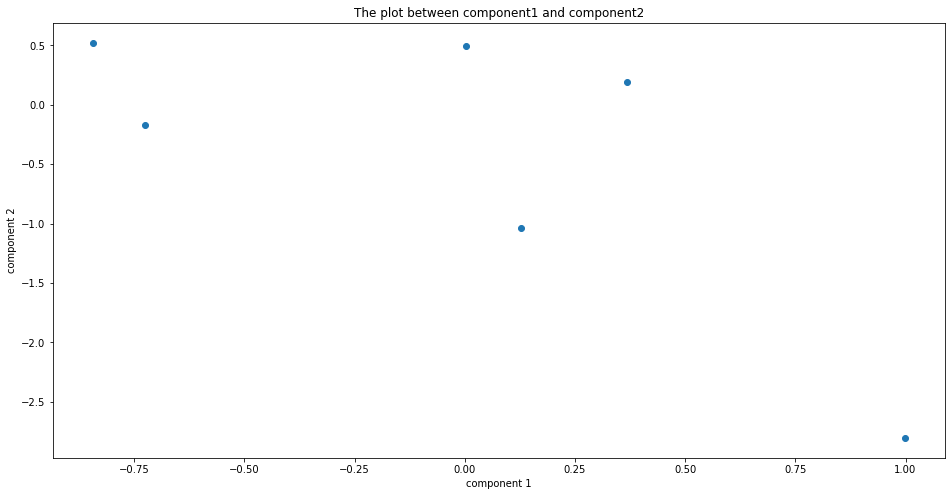

In [32]:
plt.figure(figsize=(16,8))
plt.scatter(principal_components[0], principal_components[1])
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('The plot between component1 and component2')
plt.show()